In [1]:
from sklearn.datasets import samples_generator
%pylab inline
import pandas as pd
import seaborn
import tensorflow as tf
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

figsize(10,8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def eval_model(y, y_, X_test, y_test):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))  #list of booleans
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  #cast to floating point numbers and then take the mean

    return(sess.run(accuracy, feed_dict={x: X_test, y_: y_test}))

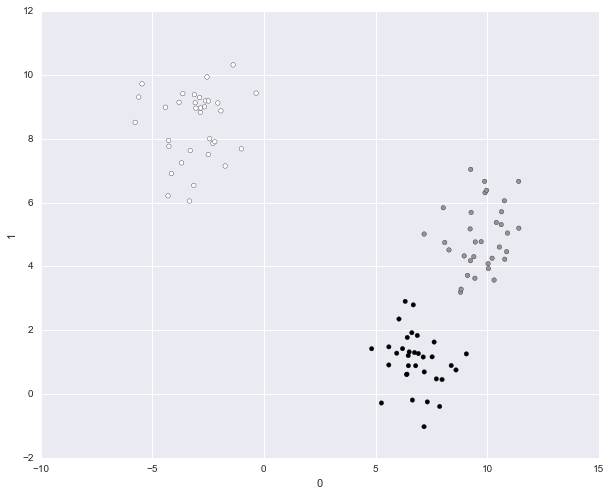

In [3]:
data = samples_generator.make_blobs()

df = pd.DataFrame(data[0])
df.plot.scatter(0, 1, c=data[1])

In [4]:
x = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable(tf.random_uniform([2, 3]))
b = tf.Variable(tf.random_uniform([3]))

layer = (tf.matmul(x,W) + b)
y = layer
softmax = tf.nn.softmax(y)
y_ = tf.placeholder(tf.float32, [None, 3])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [5]:
init = tf.initialize_all_variables()
sess = tf.Session()
print(sess.run(init))

X_train, X_test, y_train, y_test = train_test_split(data[0], pd.get_dummies(data[1]).values, train_size=.7)

for i in range(8001):
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train)
    
    l, o, output = sess.run([loss, optimizer, y], feed_dict={x: X_train_s, y_: y_train_s})
    if i % 1000 == 0:
        acc = eval_model(y, y_, X_test, y_test)
        print('Epoch: {} - Loss: {} Acc: {}'.format(i, l, acc))

None
Epoch: 0 - Loss: 1.63519370556 Acc: 0.699999988079
Epoch: 1000 - Loss: 0.0536282137036 Acc: 0.899999976158
Epoch: 2000 - Loss: 0.0388426333666 Acc: 0.899999976158
Epoch: 3000 - Loss: 0.0182234663516 Acc: 0.966666638851
Epoch: 4000 - Loss: 0.0386131741107 Acc: 0.966666638851
Epoch: 5000 - Loss: 0.0115711074322 Acc: 0.966666638851
Epoch: 6000 - Loss: 0.0275603495538 Acc: 0.966666638851
Epoch: 7000 - Loss: 0.0285388920456 Acc: 0.966666638851
Epoch: 8000 - Loss: 0.0162543859333 Acc: 0.966666638851


In [6]:
output = sess.run(softmax, feed_dict={x: data[0], y_: pd.get_dummies(data[1]).values})
output = output.argmax(axis=1)

In [7]:
size = (data[1] == output)

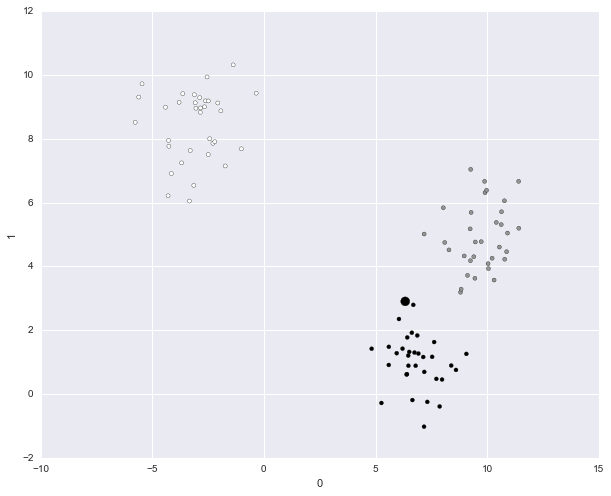

In [8]:
df.plot.scatter(0, 1, c=data[1], s=(~size+2)**4)  